Objective:
Predict whether a customer will meet their target (Met_Target) using classification, and use clustering to understand customer segments.

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [119]:
#Load the Data
df = pd.read_csv('synthetic_customer_data.csv')
print(df.head())

   Age  Income  Spending_Score  Engagement_Level  Purchase_Frequency  \
0   56   21920           73.68                 3                   7   
1   69  126121           50.10                 9                  20   
2   46   97219           57.28                 5                  43   
3   32   96872           13.72                 5                   6   
4   60  101132           93.77                 4                  36   

  Product_Category Customer_Segment  Met_Target  
0        Furniture        Low-Value           1  
1        Groceries        Low-Value           1  
2        Groceries        Low-Value           1  
3         Clothing       High-Value           1  
4           Beauty     Medium-Value           1  


In [121]:
df.shape

(5000, 8)

In [122]:
#Check for missing values(Prints a summary of null/missing values per column to help with data cleaning)
print(df.isnull().sum())

Age                   0
Income                0
Spending_Score        0
Engagement_Level      0
Purchase_Frequency    0
Product_Category      0
Customer_Segment      0
Met_Target            0
dtype: int64


In [123]:
#Understand structure of the dataframe(Shows the column names, data types, non-null counts, and memory usage.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Spending_Score      5000 non-null   float64
 3   Engagement_Level    5000 non-null   int64  
 4   Purchase_Frequency  5000 non-null   int64  
 5   Product_Category    5000 non-null   object 
 6   Customer_Segment    5000 non-null   object 
 7   Met_Target          5000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 312.6+ KB


In [124]:
#Get Summary Statistics(Gives stats like mean, std, min, max, percentiles)
df.describe() .transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,43.584600,14.919094,18.00,31.000,43.000,56.00,69.00
Income,5000.0,84632.847400,37591.056659,20060.00,51618.250,85510.500,117301.00,149974.00
Spending_Score,5000.0,50.138912,28.841016,0.02,25.935,50.415,74.77,99.98
Engagement_Level,5000.0,4.946600,2.582844,1.00,3.000,5.000,7.00,9.00
Purchase_Frequency,5000.0,24.979000,14.130283,1.00,13.000,25.000,37.00,49.00
Met_Target,5000.0,0.593800,0.491172,0.00,0.000,1.000,1.00,1.00


#Insights from the above summary statistics
1.Data follows a normal distribution.
2.The customer base is diverse in age, with a significant portion in their 30s to 50s.
3.Slightly more than half of the customers met the target, indicating room for improvement in targeting strategies.

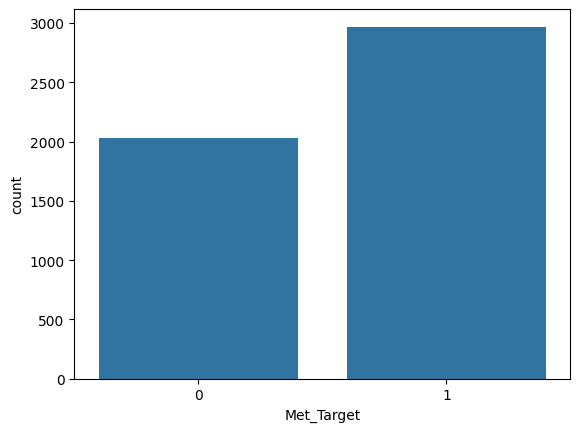

In [126]:
#Visualize using a countplot(Creates a count plot to visualize how many customers met the target vs. not.)
sns.countplot(x='Met_Target', data=df)
plt.show()

1.Customers that met the target we're more than those who did not meet the target.

In [127]:
df.head()

,Age,Income,Spending_Score,Engagement_Level,Purchase_Frequency,Product_Category,Customer_Segment,Met_Target
0,56,21920,73.68,3,7,Furniture,Low-Value,1
1,69,126121,50.10,9,20,Groceries,Low-Value,1
2,46,97219,57.28,5,43,Groceries,Low-Value,1
3,32,96872,13.72,5,6,Clothing,High-Value,1
4,60,101132,93.77,4,36,Beauty,Medium-Value,1


Boxplot - Numerical Data

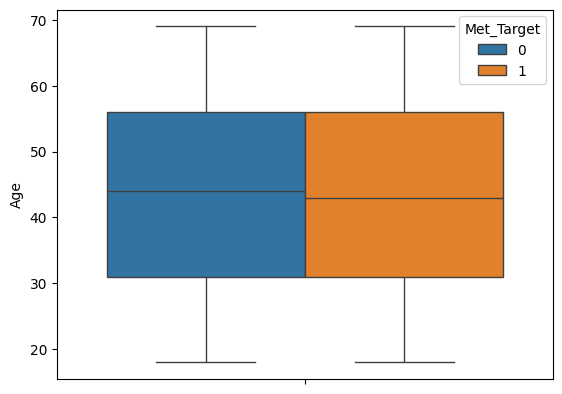

In [128]:
#Visualize using Boxplot
sns.boxplot(hue='Met_Target', y='Age', data = df)
plt.show()

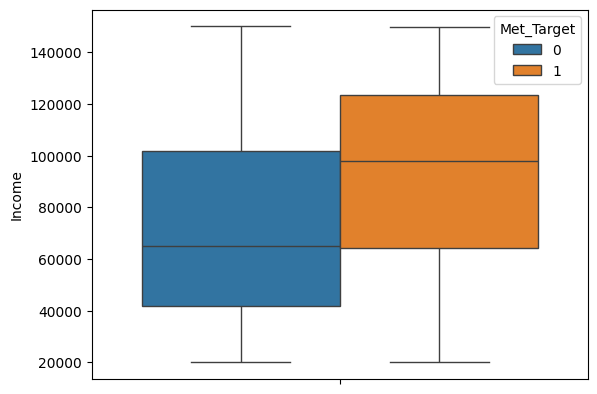

In [129]:
sns.boxplot(hue='Met_Target', y='Income', data = df)
plt.show()

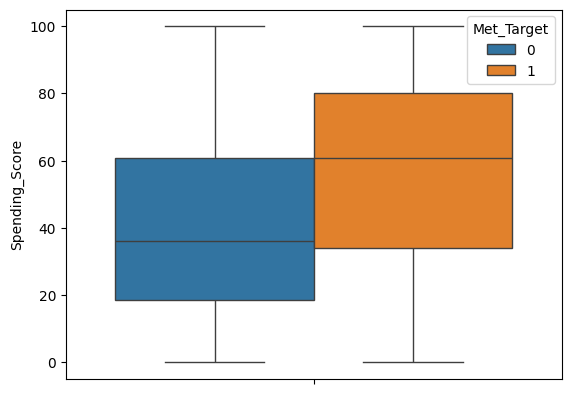

In [130]:
sns.boxplot(hue='Met_Target', y='Spending_Score', data = df)
plt.show()

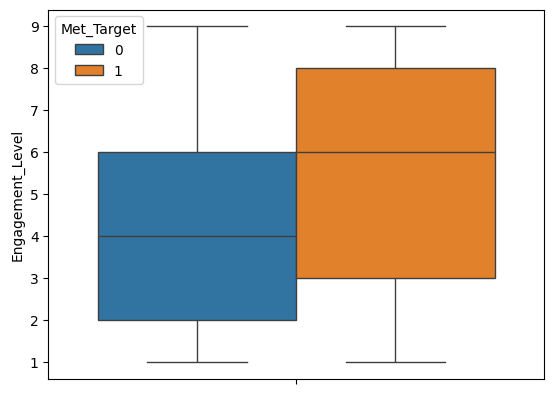

In [131]:
sns.boxplot(hue='Met_Target', y='Engagement_Level', data = df)
plt.show()

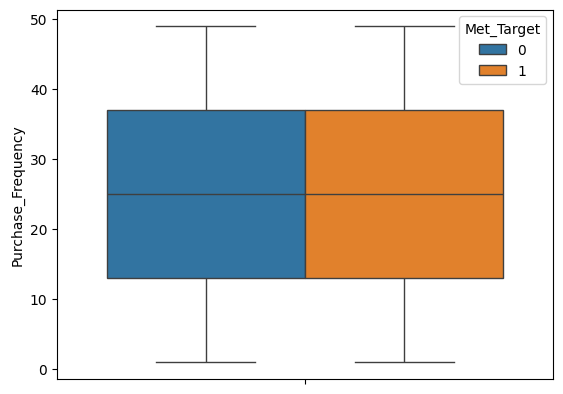

In [132]:
sns.boxplot(hue='Met_Target', y='Purchase_Frequency', data = df)
plt.show()

Countplot - Categorical Data

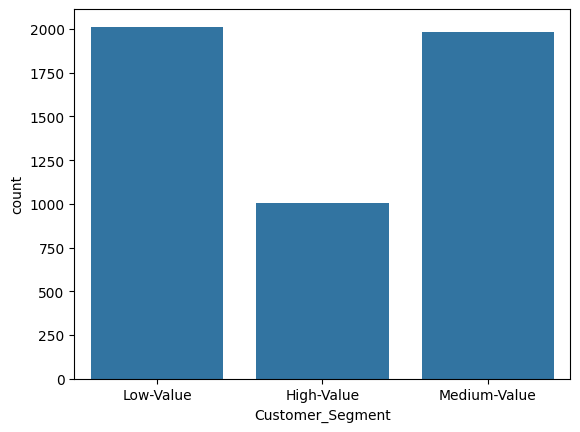

In [133]:
sns.countplot(x='Customer_Segment', data=df)
plt.show()

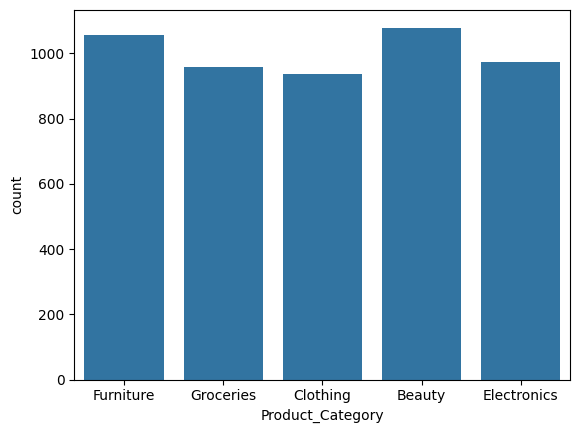

In [134]:
sns.countplot(x='Product_Category', data=df)
plt.show()

Correlation analysis- Check for correlations between features to identify potential multicollinearity.

In [135]:
#selects only numerical columns fro the data frame,droping  the target variable
df_num = df.select_dtypes(exclude={'object'}).drop({'Met_Target'}, axis=1)
df_num
df_num.corr()#This calculates the correlation matrix for all the numeric columns except Met_Target.

,Age,Income,Spending_Score,Engagement_Level,Purchase_Frequency
Age,1.000000,-0.015931,-0.003697,0.005794,0.003732
Income,-0.015931,1.000000,0.022116,0.004410,0.016926
Spending_Score,-0.003697,0.022116,1.000000,0.012645,-0.015504
Engagement_Level,0.005794,0.004410,0.012645,1.000000,0.015749
Purchase_Frequency,0.003732,0.016926,-0.015504,0.015749,1.000000


In [136]:
df.head()

,Age,Income,Spending_Score,Engagement_Level,Purchase_Frequency,Product_Category,Customer_Segment,Met_Target
0,56,21920,73.68,3,7,Furniture,Low-Value,1
1,69,126121,50.10,9,20,Groceries,Low-Value,1
2,46,97219,57.28,5,43,Groceries,Low-Value,1
3,32,96872,13.72,5,6,Clothing,High-Value,1
4,60,101132,93.77,4,36,Beauty,Medium-Value,1


In [138]:
df.shape

(5000, 8)

In [139]:
#Count values in product category column
df['Product_Category'].value_counts()

Product_Category
Beauty         1079
Furniture      1055
Electronics     972
Groceries       957
Clothing        937
Name: count, dtype: int64

In [140]:
#Perform One hot encoding on the columns.
df = pd.get_dummies(df)#Creates new dummy columns and use boolean (false & true) for those columns
df.head()

,Age,Income,Spending_Score,Engagement_Level,Purchase_Frequency,Met_Target,Product_Category_Beauty,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Furniture,Product_Category_Groceries,Customer_Segment_High-Value,Customer_Segment_Low-Value,Customer_Segment_Medium-Value
0,56,21920,73.68,3,7,1,False,False,False,True,False,False,True,False
1,69,126121,50.10,9,20,1,False,False,False,False,True,False,True,False
2,46,97219,57.28,5,43,1,False,False,False,False,True,False,True,False
3,32,96872,13.72,5,6,1,False,True,False,False,False,True,False,False
4,60,101132,93.77,4,36,1,True,False,False,False,False,False,False,True


In [142]:
#Perform Label Encoding on the dummified columns. converting them into integers (True → 1, False → 0)
df_object = df.select_dtypes(include={'bool'})
le = LabelEncoder()
for col in df_object:
    df[col] = le.fit_transform(df[col])

In [143]:
df.head()

,Age,Income,Spending_Score,Engagement_Level,Purchase_Frequency,Met_Target,Product_Category_Beauty,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Furniture,Product_Category_Groceries,Customer_Segment_High-Value,Customer_Segment_Low-Value,Customer_Segment_Medium-Value
0,56,21920,73.68,3,7,1,0,0,0,1,0,0,1,0
1,69,126121,50.10,9,20,1,0,0,0,0,1,0,1,0
2,46,97219,57.28,5,43,1,0,0,0,0,1,0,1,0
3,32,96872,13.72,5,6,1,0,1,0,0,0,1,0,0
4,60,101132,93.77,4,36,1,1,0,0,0,0,0,0,1


In [145]:
df.shape

(5000, 14)

In [1]:
# Clustering (KMeans for customer segmentation)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [160]:
# Drop the target for clustering
clustering_data = df.drop('Met_Target', axis=1)

In [161]:
# Standardize the features for better clustering
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

In [193]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Customer_Segment'] = kmeans.fit_predict(clustering_scaled)
df['Customer_Segment']

0       0
1       1
2       1
3       2
4       1
       ..
4995    0
4996    0
4997    0
4998    1
4999    0
Name: Customer_Segment, Length: 5000, dtype: int32

In [199]:
# STEP 3: Prepare final dataset for classification
X = df.drop('Met_Target', axis=1)
y = df['Met_Target']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5000, 14)
y shape: (5000,)


In [200]:
#split data 
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [201]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (4000, 14)
y_train shape: (4000,)


In [ ]:
# Train a classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [203]:
# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)

In [205]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[243 178]
 [135 444]]


In [206]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       421
           1       0.71      0.77      0.74       579

    accuracy                           0.69      1000
   macro avg       0.68      0.67      0.67      1000
weighted avg       0.68      0.69      0.68      1000

